<a href="https://colab.research.google.com/github/jongjong2323/colab01/blob/main/4_7_391p_~411p_(%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C_412p_~414p_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)


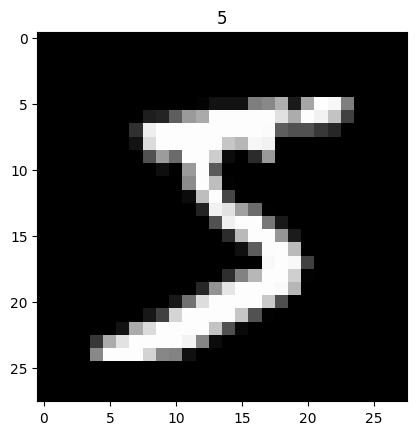

(60000, 784) (10000, 784)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
(x_train,t_train),(x_test,t_test)=mnist.load_data() #MNIST 읽어 들이기
print(x_train.shape,x_test.shape) #28x28의 손으로 쓴 문자 이미지가 6만 장
#각 픽셀의 값을 -1에서 1의 범위에 넣는다
x_train=x_train/255*2-1
x_test=x_test/255*2-1
#손으로 쓴 문자 이미지의 표시
plt.imshow(x_train[0].reshape(28,28),cmap='gray')
plt.title(t_train[0])
plt.show()
#1차원으로 변환 한다
x_train=x_train.reshape(x_train.shape[0],-1)
x_test=x_test.reshape(x_test.shape[0],-1)
print(x_train.shape,x_test.shape)
#훈련용 데이터의 준비


In [4]:
n_learn=20001 #학습 횟수
interval=2000 #이미지를 생성하는 간격
batch_size=32
n_noize=128 #노이즈의 수
img_size=28 #생성되는 이미지의 높이와 폭
alpha=0.2 #Leaky ReLU의 음의 영역에서의 기울기
from tensorflow.python.keras.optimizers import adam_v2
optimizer=adam_v2.Adam(0.0002,0.5)
#GAN의 각 설정

In [5]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,LeakyReLU
#Generator의 망 구축
generator=Sequential()
generator.add(Dense(256,input_shape=(n_noize,)))
generator.add(LeakyReLU(alpha=alpha))
generator.add(Dense(512))
generator.add(LeakyReLU(alpha=alpha))
generator.add(Dense(1024))
generator.add(LeakyReLU(alpha=alpha))
generator.add(Dense(img_size**2,activation='tanh'))
print(generator.summary())
#Generator의 구축

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               33024     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 784)               8

In [6]:
#Discriminator의 망 구축
discriminator=Sequential()
discriminator.add(Dense(512,input_shape=(img_size**2,)))
discriminator.add(LeakyReLU(alpha=alpha))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(alpha=alpha))
discriminator.add(Dense(1,activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
print(discriminator.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.layers import Input
#결합 시는 Generator만 훈련한다
discriminator.trainable=False
#Generator에 의해 노이즈로부터 생선된 이미지를 Discriminator가 판정한다
noise=Input(shape=(n_noize,))
img=generator(noise)
reality=discriminator(img)
#Generator와 Discriminator의 결합
combined=Model(noise,reality)
combined.compile(loss='binary_crossentropy',optimizer=optimizer)
print(combined.summary())
#Generator와 Discriminator를 결합한다

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128)]             0         
_________________________________________________________________
sequential (Sequential)      (None, 784)               1493520   
_________________________________________________________________
sequential_1 (Sequential)    (None, 1)                 533505    
Total params: 2,027,025
Trainable params: 1,493,520
Non-trainable params: 533,505
_________________________________________________________________
None


In [8]:
def generate_images(i):
  n_rows=5 #행 수
  n_cols=5 #열 수
  noise=np.random.normal(0,1,(n_rows*n_cols,n_noize))
  g_imgs=generator.predict(noise)
  g_imgs=g_imgs/2+0.5 #0-1의 범위로 한다
  matrix_image=np.zeros((img_size*n_rows,img_size*n_cols)) #전체의 이미지
  #생성된 이미지를 나열해 1장의 이미지로 한다
  for r in range(n_rows):
    for c in range(n_cols):
      g_img=g_imgs[r*n_cols+c].reshape(img_size,img_size)
      matrix_image[r*img_size:(r+1)*img_size,c*img_size:(c+1)*img_size]=g_img
  plt.figure(figsize=(10,10))
  plt.imshow(matrix_image,cmap='Greys_r')
  plt.tick_params(labelbottom=False,labelleft=False,bottom=False,left=False) #측 눈금의 라벨과 선을 지운다
  plt.show()
  #이미지를 생성하는 함수

n_learn: 0
loss_fake: 0.5336608290672302 acc_fake: 1.0
loss_real: 0.8653708696365356 acc_real: 0.3125
loss_comb: 1.0424662828445435


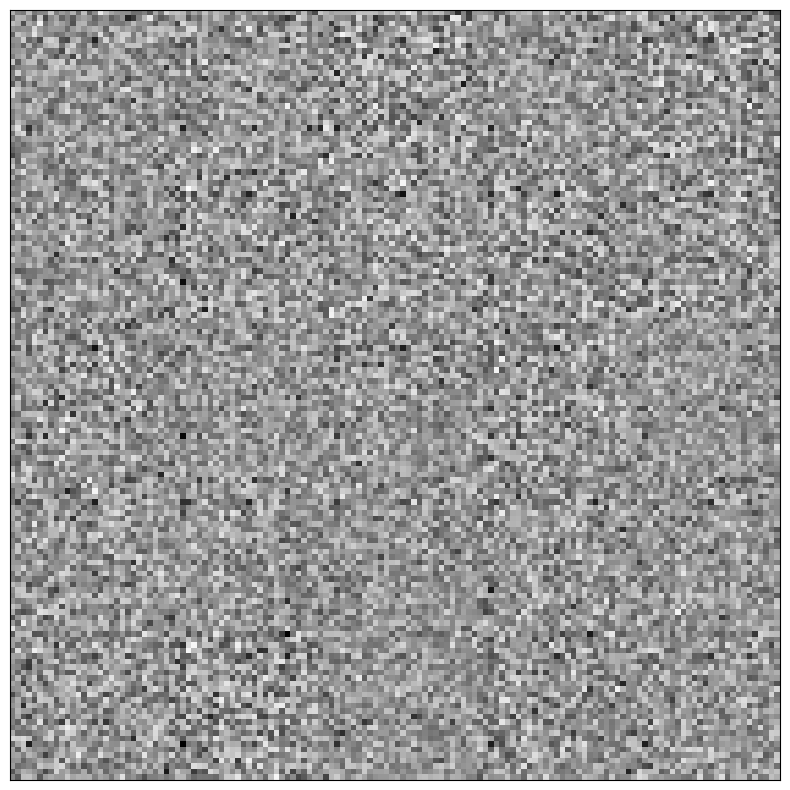

n_learn: 2000
loss_fake: 0.47878438234329224 acc_fake: 0.9375
loss_real: 0.39559313654899597 acc_real: 0.8125
loss_comb: 1.105736255645752


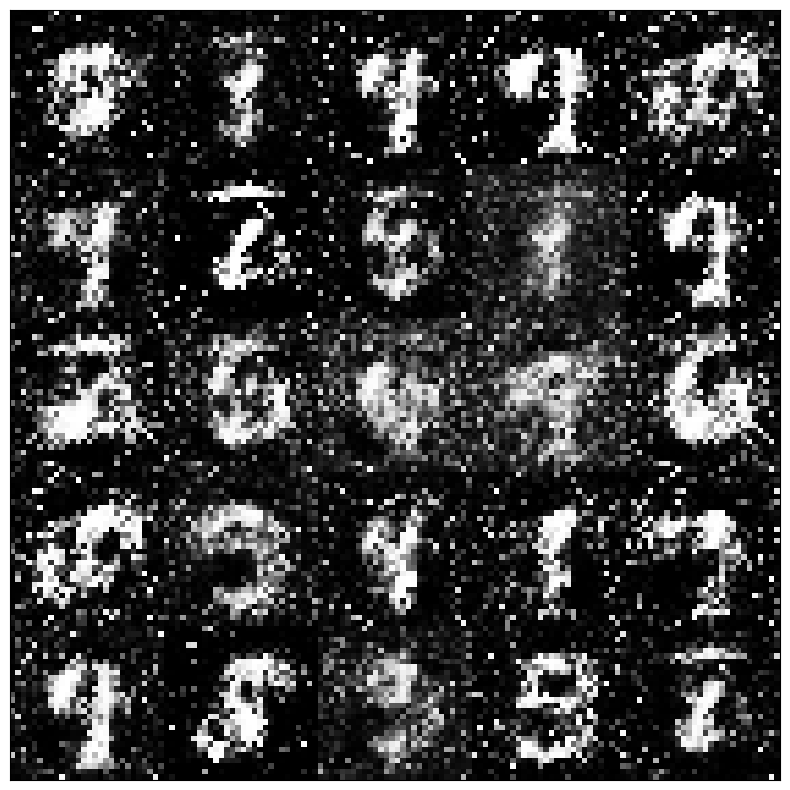

n_learn: 4000
loss_fake: 0.6034712791442871 acc_fake: 0.75
loss_real: 0.7351831793785095 acc_real: 0.375
loss_comb: 0.7613123655319214


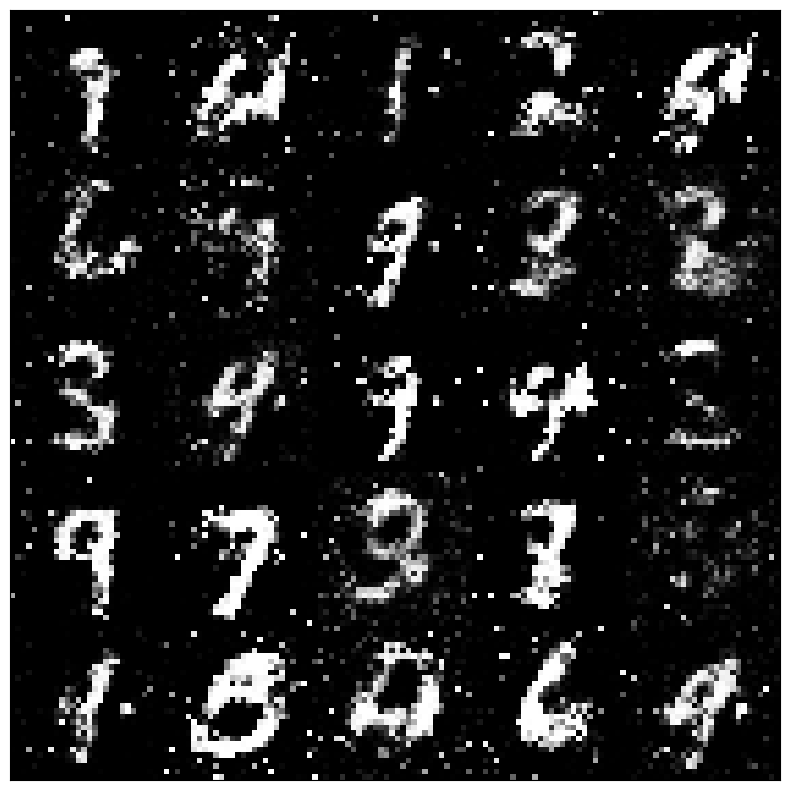

n_learn: 6000
loss_fake: 0.693114161491394 acc_fake: 0.5625
loss_real: 0.7363840341567993 acc_real: 0.5625
loss_comb: 0.7575793266296387


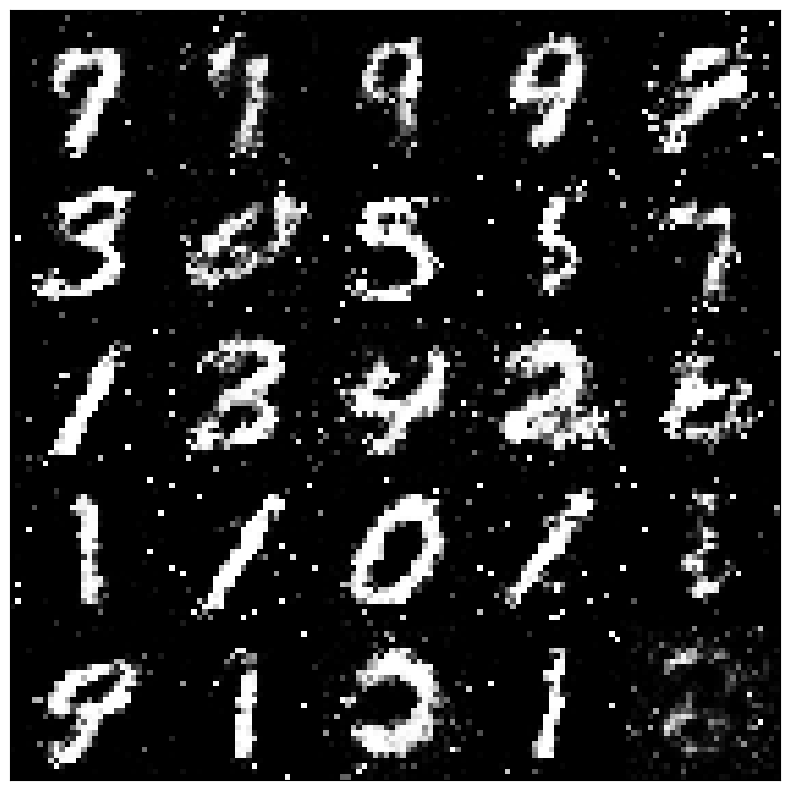

n_learn: 8000
loss_fake: 0.592483401298523 acc_fake: 0.75
loss_real: 0.6501131057739258 acc_real: 0.6875
loss_comb: 0.7843624353408813


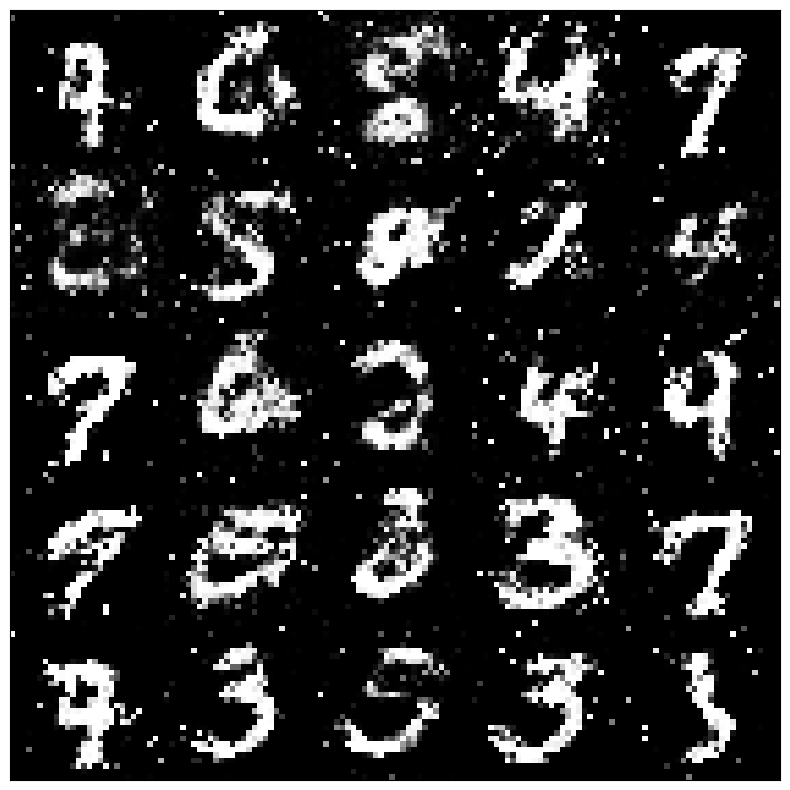

n_learn: 10000
loss_fake: 0.516801118850708 acc_fake: 0.8125
loss_real: 0.6529062390327454 acc_real: 0.5
loss_comb: 0.878157377243042


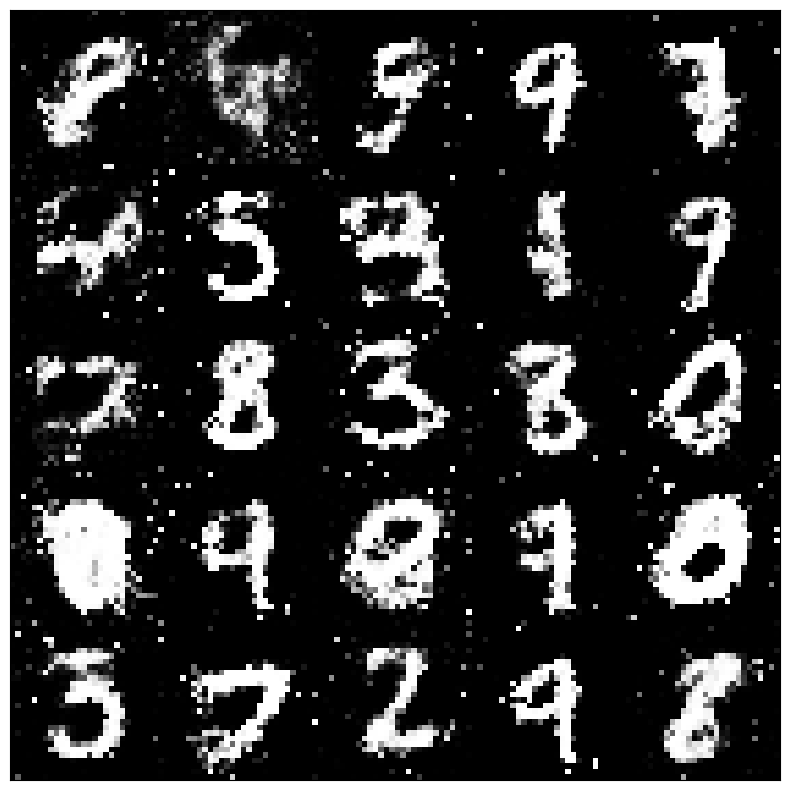

n_learn: 12000
loss_fake: 0.5762683153152466 acc_fake: 0.75
loss_real: 0.5275071263313293 acc_real: 0.875
loss_comb: 0.8003096580505371


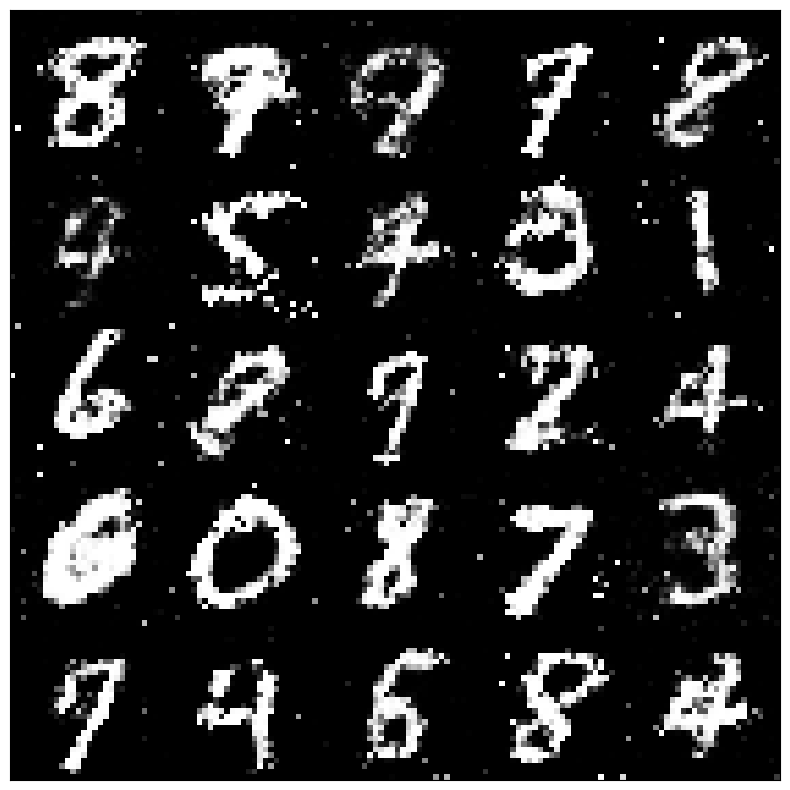

n_learn: 14000
loss_fake: 0.616767168045044 acc_fake: 0.6875
loss_real: 0.6423697471618652 acc_real: 0.625
loss_comb: 0.8799852728843689


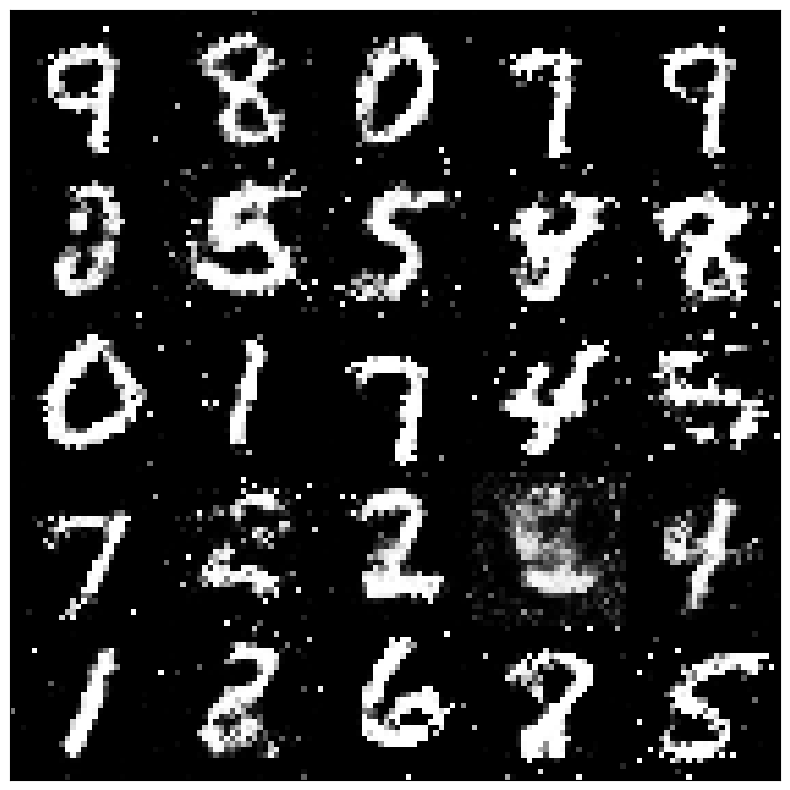

n_learn: 16000
loss_fake: 0.7253175973892212 acc_fake: 0.375
loss_real: 0.6461873650550842 acc_real: 0.5625
loss_comb: 0.8633493185043335


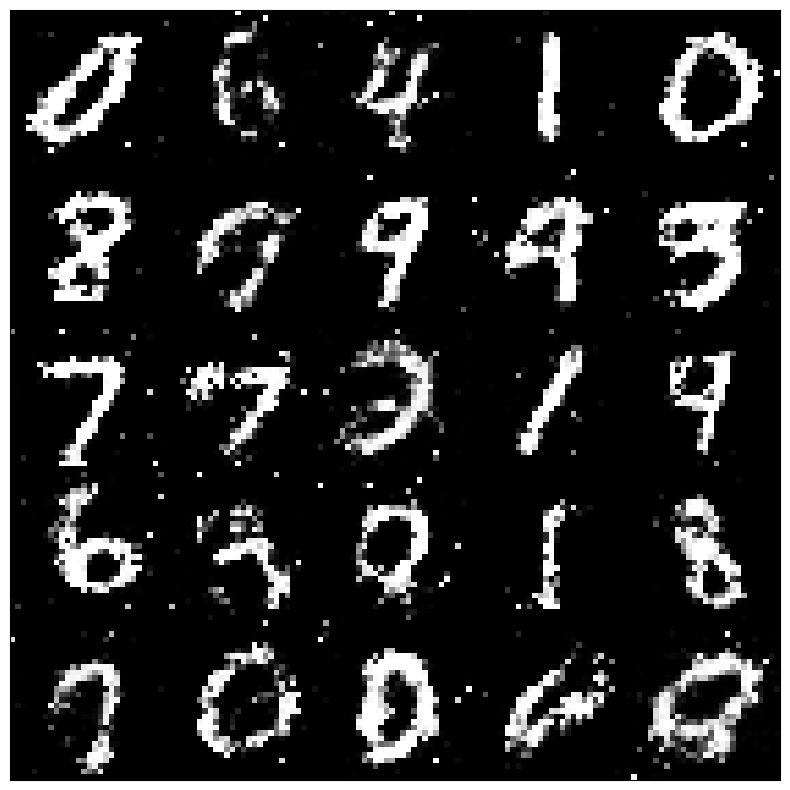

n_learn: 18000
loss_fake: 0.5880874395370483 acc_fake: 0.6875
loss_real: 0.6777993440628052 acc_real: 0.5625
loss_comb: 0.8980879187583923


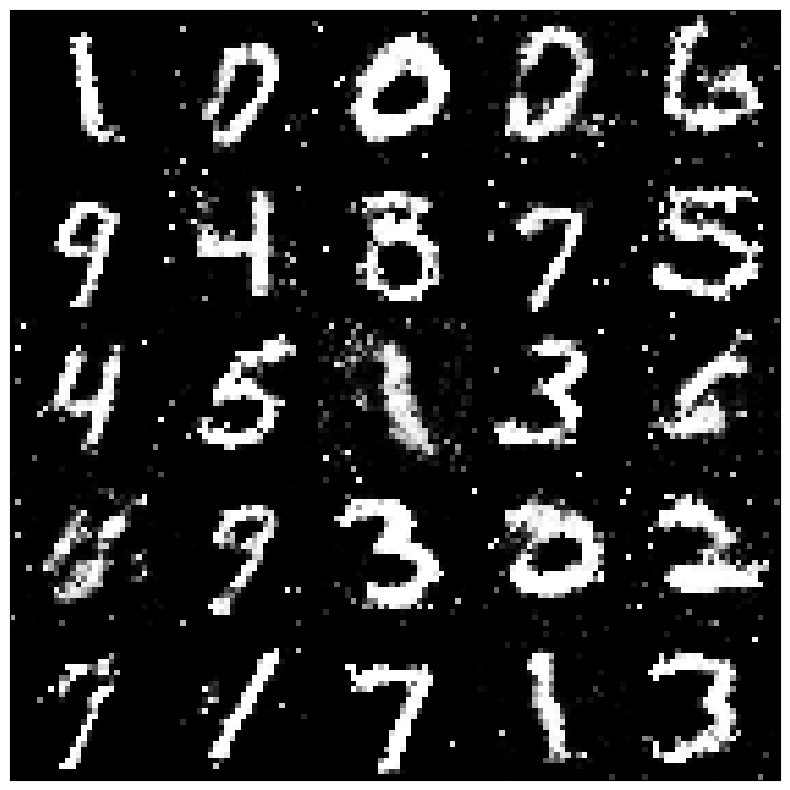

n_learn: 20000
loss_fake: 0.6021679639816284 acc_fake: 0.75
loss_real: 0.6031200885772705 acc_real: 0.625
loss_comb: 0.7978217601776123


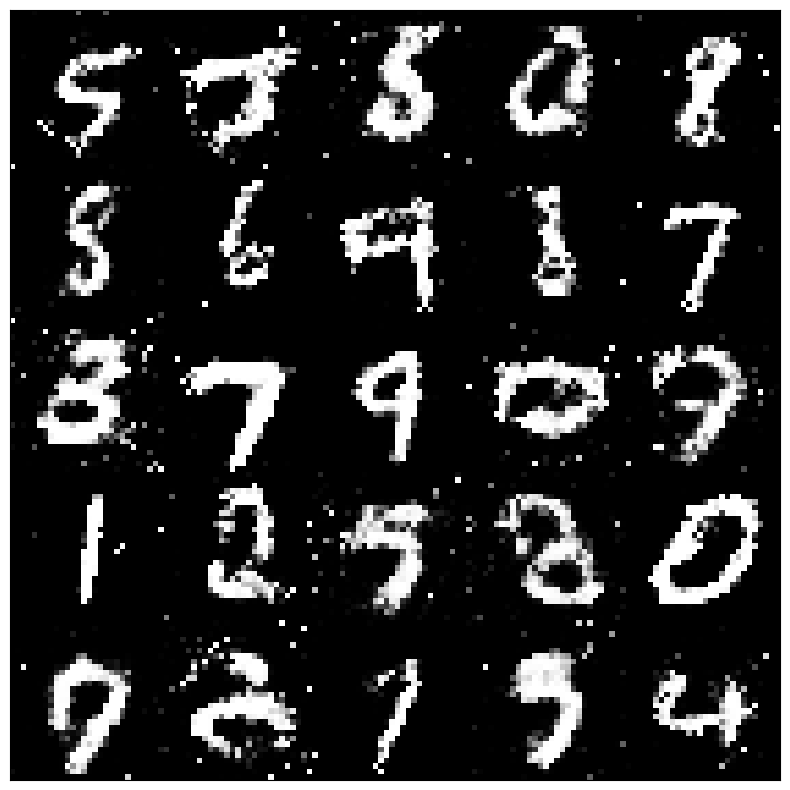

In [9]:
batch_half=batch_size//2
loss_record=np.zeros((n_learn,3))
acc_record=np.zeros((n_learn,2))
for i in range(n_learn):
  #노이즈로부터 이미지를 생성해 Discriminator를 훈련
  g_noise=np.random.normal(0,1,(batch_half,n_noize))
  g_imgs=generator.predict(g_noise)
  loss_fake,acc_fake=discriminator.train_on_batch(g_imgs,np.zeros((batch_half,1)))
  loss_record[i][0]=loss_fake
  acc_record[i][0]=acc_fake
  #진짜 이미지를 사용해서 Discriminator를 훈련
  rand_ids=np.random.randint(len(x_train),size=batch_half)
  real_imgs=x_train[rand_ids,:]
  loss_real,acc_real=discriminator.train_on_batch(real_imgs,np.ones((batch_half,1)))
  loss_record[i][1]=loss_real
  acc_record[i][1]=acc_real
  #결합한 모델에 의해 Generator를 훈련
  c_noise=np.random.normal(0,1,(batch_size,n_noize))
  loss_comb=combined.train_on_batch(c_noise,np.ones((batch_size,1)))
  loss_record[i][2]=loss_comb
  #일정간격으로 생성된 이미지를 표시
  if i % interval == 0:
    print("n_learn:",i)
    print("loss_fake:",loss_fake,"acc_fake:",acc_fake)
    print("loss_real:",loss_real,"acc_real:",acc_real)
    print("loss_comb:",loss_comb)

    generate_images(i)
    #GAN의 학습

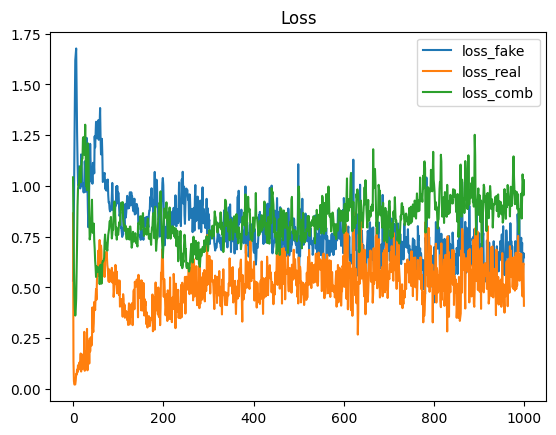

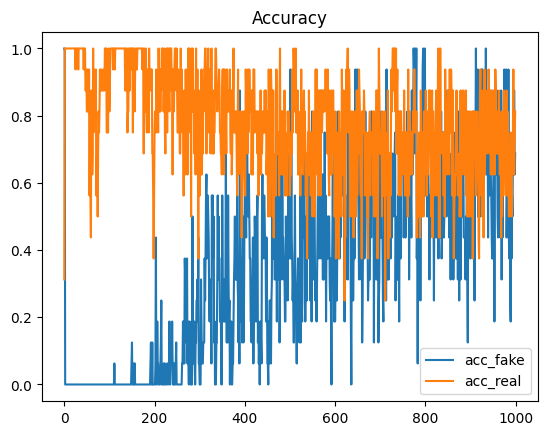

In [10]:
#오차의 추이
n_plt_loss=1000 #오차의 표시 범위
plt.plot(np.arange(n_plt_loss),loss_record[:n_plt_loss,0],label='loss_fake')
plt.plot(np.arange(n_plt_loss),loss_record[:n_plt_loss,1],label='loss_real')
plt.plot(np.arange(n_plt_loss),loss_record[:n_plt_loss,2],label='loss_comb')
plt.legend()
plt.title('Loss')
plt.show()
#정밀도의 추이
n_plt_acc=1000 #정밀도의 표시 범위
plt.plot(np.arange(n_plt_acc),acc_record[:n_plt_acc,0],label='acc_fake')
plt.plot(np.arange(n_plt_acc),acc_record[:n_plt_acc,1],label='acc_real')
plt.legend()
plt.title('Accuracy')
plt.show()
#오차와 정밀도의 추이
